In [3]:
import pickle 
from comdo.utils import *
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from comdo.utils import *

# memory_profiles= ["fractional", "constant", "linear", "exponential"]
# lens_memory= [1, 5, 10, 50, 100]
# bs = [1.5, 2, 5]
# _lambdas =  [0.5, 1.5, 2.5]
# betas_c = [0, 0.04, 0.2, 0.6, 1]
# betas_cm= [0, 0.04, 0.2, 0.6, 1]
# betas_g= [0, 0.04, 0.2, 0.6, 1]
# betas_gm= [0, 0.04, 0.2, 0.6, 1]

max_iterations = 200
memory_profiles= ["fractional"] # , "constant", "linear", "exponential"]
lens_memory= [10]
# bs = [2]
# _lambdas =  [2.5]
# betas_c = [ 0.2,]
# betas_cm= [0.04]
# betas_g= [0.2]
# betas_gm= [0.04]


# # TODO:
# # this setup has 3600 simulations! with 30 sec / simulation, that's 30 hours!
# # Do Sergio's Montecarlo sampling instead

# # I'm still very interested in finding out if some parameters are redundant
# # to find this out, I'll run only 20 experiments for 1 memory profile after I do the Montecarlo thing
# # decrease degrees of freedom further: cut 5 and 50 from lens memory, use bs = [2], use 1 lambda based on the meeting w/ Sergio
#     # use betas only [0, 0.01, 0.1, 1]

# max_iterations= 1000
# memory_profiles= ["fractional", "constant", "linear", "exponential"]
# lens_memory= [1, 5, 10, 50, 100]
# bs = [1.5, 2, 5]
# _lambdas =  [0.5, 1.5, 2.5]
# betas_c = [0, 0.04, 0.2, 0.6, 1]
# betas_cm= [0, 0.04, 0.2, 0.6, 1]
# betas_g= [0, 0.04, 0.2, 0.6, 1]
# betas_gm= [0, 0.04, 0.2, 0.6, 1]


# performance_dict = optimize(memory_profiles= memory_profiles, bs= bs, _lambdas= _lambdas, lens_memory= lens_memory, betas_c = betas_c, betas_cm= betas_cm, betas_g= betas_g, betas_gm= betas_gm)
performance_dict = optimize(max_iterations= max_iterations, memory_profiles= memory_profiles)

In [2]:
print(performance_dict.keys())

print(performance_dict.items())

dict_keys([((1.0, 0.0), 'fractional', 2, 2.5, 10, 0.2, 0.04, 0.2, 0.04), ((0.0, 1.0), 'fractional', 2, 2.5, 10, 0.2, 0.04, 0.2, 0.04)])
dict_items([(((1.0, 0.0), 'fractional', 2, 2.5, 10, 0.2, 0.04, 0.2, 0.04), {'n_iterationsUntilConvergence': 5}), (((0.0, 1.0), 'fractional', 2, 2.5, 10, 0.2, 0.04, 0.2, 0.04), {'n_iterationsUntilConvergence': 550})])


# Minimal gridsearch - only different orders of magnitude

To run it took 347 min = 5.8h with 5184 simulations - exactly as expected

In [2]:
from comdo.utils import *


# to run it took 347 min = 5.8h with 5184 simulations - exactly as expected

max_iterations = 200    # takes max 5s (for fractional profile)
memory_profiles= ["fractional", "constant", "linear", "exponential"]
lens_memory= [1, 10, 100]
bs = [1.3, 3]
_lambdas =  [0.5, 1.5]
betas_c = [0.01, 0.1, 1]
betas_cm= [0, 0.01, 0.1, 1]
betas_g= [0.01, 0.1, 1]
betas_gm= [0, 0.01, 0.1, 1]


performance_dict = optimize(max_iterations= max_iterations, memory_profiles= memory_profiles, bs= bs, _lambdas= _lambdas, lens_memory= lens_memory, betas_c = betas_c, betas_cm= betas_cm, betas_g= betas_g, betas_gm= betas_gm)

/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/comdo/utils.py:343: RuntimeWarning: invalid value encountered in scalar add
  z_g[agent_i][param_i][0] = sum([ memory_weights[memory_i] * gradient_memory[agent_i][param_i][memory_i] for memory_i in range(len_memory)])
/home/andrei/.local/lib/python3.10/site-packages/jax/interpreters/xla.py:251: RuntimeWarning: overflow encountered in cast
  return np.asarray(x, dtypes.canonicalize_dtype(x.dtype))
/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/comdo/utils.py:303: RuntimeWarning: invalid value encountered in scalar subtract
  consesus_term[agent_i][param_i][0] = beta_c * sum( [ (x[agent_j][param_i][0] - x[agent_i][param_i][0]) for agent_j in range(n_agents) if agent_j!= agent_i ] )
/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/comdo/utils.py:376: RuntimeWarning: invalid value encountered in scalar multiply
  - beta_gm * gradient_memoryFeedback[agent_i][param_i][0]
/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/comdo/

In [3]:
import pickle 

with open('saved_performance_dict.pkl', 'wb') as f:
    pickle.dump(performance_dict, f)

In [6]:
print(performance_dict.keys())

print("number simulations: ", len(performance_dict.keys()))

print(performance_dict.items())

dict_keys([((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 0.01, 0), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 0.01, 0.01), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 0.01, 0.1), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 0.01, 1), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 0.1, 0), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 0.1, 0.01), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 0.1, 0.1), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 0.1, 1), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 1, 0), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 1, 0.01), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 1, 0.1), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0, 1, 1), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0.01, 0.01, 0), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0.01, 0.01, 0.01), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0.01, 0.01, 0.1), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0.01, 0.01, 1), ((1.0, 0.0), 'exponential', 1.3, 1, 0.01, 0.01, 0.1, 0), ((1.0, 0.0), 'exponential', 1.3, 1, 

In [6]:
with open("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/saved_performance_dict.pkl", "rb") as f:
    performance_dict = pickle.load(f)

print("number simulations: ", len(performance_dict.keys()))


number simulations:  5184


## CTD on `gridsearch_23Feb2024.ipynb` Do barplots + inspect sensitivity to individual hyperparameters

This is especially for memory terms - see if they're redundant by looking if performance drops when beta = 0



In [5]:
print(performance_dict[((1.0, 0.0), 'fractional', 2, 2.5, 10, 0.2, 0.04, 0.2, 0.04)])

{'n_iterationsUntilConvergence': 0}


In [19]:

import matplotlib.pyplot as plt
import numpy as np

fractional_steep = {}
fractional_flat = {}

constant_steep = {}
constant_flat = {}

linear_steep = {}
linear_flat = {}

exponential_steep = {}
exponential_flat = {}

for key, value in performance_dict.items():
    if "fractional" in key and (1.0, 0.0) in key:
        fractional_steep[key] = value

    if "fractional" in key and (0.0, 1.0) in key:
        fractional_flat[key] = value

    if "constant" in key and (1.0, 0.0) in key:
        constant_steep[key] = value
    if "constant" in key and (0.0, 1.0) in key:
        constant_flat[key] = value

    if "linear" in key and (1.0, 0.0) in key:
        linear_steep[key] = value
    if "linear" in key and (0.0, 1.0) in key:
        linear_flat[key] = value

    if "exponential" in key and (1.0, 0.0) in key:
        exponential_steep[key] = value
    if "exponential" in key and (0.0, 1.0) in key:
        exponential_flat[key] = value


fractional_flat = sorted(fractional_flat, key=fractional_flat.get)
constant_flat = sorted(constant_flat, key=constant_flat.get)
linear_flat = sorted(linear_flat, key=fractional_steep.get)
exponential_flat = sorted(exponential_flat, key=fractional_steep.get)

fractional_steep = sorted(fractional_steep, key=fractional_steep.get)
constant_steep = sorted(constant_steep, key=constant_steep.get)
linear_steep = sorted(linear_steep, key=linear_steep.get)
exponential_steep = sorted(exponential_steep, key=exponential_steep.get)



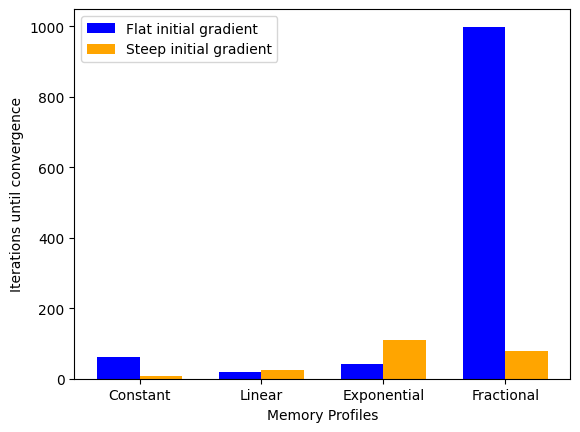

In [2]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the performance data for each category
fractional_steep = performance_dict[((1.0, 0.0), 'fractional', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]
fractional_flat = performance_dict[((0.0, 1.0), 'fractional', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]

constant_flat = performance_dict[((1.0, 0.0), 'constant', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]
constant_steep = performance_dict[((0.0, 1.0), 'constant', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]

linear_steep = performance_dict[((1.0, 0.0), 'linear', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]
linear_flat = performance_dict[((0.0, 1.0), 'linear', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]

exponential_steep = performance_dict[((1.0, 0.0), 'exponential', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]
exponential_flat = performance_dict[((0.0, 1.0), 'exponential', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]

# Combine the data for plotting
steep_data = [constant_steep, linear_steep, exponential_steep, fractional_steep]
flat_data = [constant_flat, linear_flat, exponential_flat, fractional_flat]

# Create bar plot
bar_width = 0.35
index = np.arange(4)

fig, ax = plt.subplots()
bar1 = ax.bar(index, steep_data, bar_width, label='Flat initial gradient', color='blue')
bar2 = ax.bar(index + bar_width, flat_data, bar_width, label='Steep initial gradient', color='orange')

# Customize the plot
ax.set_xlabel('Memory Profiles')
ax.set_ylabel('Iterations until convergence')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Constant', 'Linear', 'Exponential', 'Fractional'])
ax.legend()

# Show the plot
plt.show()


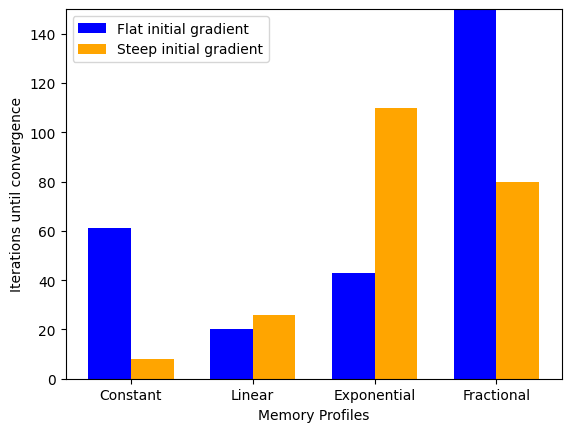

In [4]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the performance data for each category
fractional_steep = performance_dict[((1.0, 0.0), 'fractional', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]
fractional_flat = performance_dict[((0.0, 1.0), 'fractional', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]

constant_flat = performance_dict[((1.0, 0.0), 'constant', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]
constant_steep = performance_dict[((0.0, 1.0), 'constant', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]

linear_steep = performance_dict[((1.0, 0.0), 'linear', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]
linear_flat = performance_dict[((0.0, 1.0), 'linear', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]

exponential_steep = performance_dict[((1.0, 0.0), 'exponential', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]
exponential_flat = performance_dict[((0.0, 1.0), 'exponential', 2, 2.5, 10, 0.2, 0.04, 0.6, 0.36)]

# Combine the data for plotting
steep_data = [constant_steep, linear_steep, exponential_steep, fractional_steep]
flat_data = [constant_flat, linear_flat, exponential_flat, fractional_flat]

# Create bar plot
bar_width = 0.35
index = np.arange(4)

fig, ax = plt.subplots()
bar1 = ax.bar(index, steep_data, bar_width, label='Flat initial gradient', color='blue')
bar2 = ax.bar(index + bar_width, flat_data, bar_width, label='Steep initial gradient', color='orange')

# Customize the plot
ax.set_xlabel('Memory Profiles')
ax.set_ylabel('Iterations until convergence')
ax.set_ylim(0, 150)


ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Constant', 'Linear', 'Exponential', 'Fractional'])
ax.legend()

# Show the plot
plt.show()
